In [4]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import Required Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
data = pd.read_csv('E:/HACKATHON PROJECT/merged_train_data.csv')  # Replace with your dataset path
print("Dataset Loaded Successfully!")
print(data.head())


Dataset Loaded Successfully!
         ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  \
0              272                      0.0                    5.0   
1             2200                      9.0                    0.0   
2             1061                     77.0                  119.0   
3              780                     13.0                   18.0   
4             1981                      0.0                    0.0   

   Overall_Experience  ... Onboard_Wifi_Service Onboard_Entertainment  \
0                   0  ...

### Preprocessing the Dataset ###

In [6]:
# Separate Features and Target
X = data.drop(['ID', 'Overall_Experience'], axis=1)  # Drop unnecessary columns
y = data['Overall_Experience']  # Target variable

# Identify Categorical Columns
categorical_cols = X.select_dtypes(include=['object']).columns

# One-Hot Encode Categorical Columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling for Numerical Columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

print("Preprocessing Complete!")


Preprocessing Complete!


In [7]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the Neural Network Model
model = Sequential()

# Input Layer
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden Layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Dropout for Regularization
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print Model Summary
model.summary()


c:\Users\jsanc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,481 (80.00 KB)

 Trainable params: 20,481 (80.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5461 - loss: 0.6894 - val_accuracy: 0.5476 - val_loss: 0.6889
Epoch 2/50
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5448 - loss: 0.6893 - val_accuracy: 0.5476 - val_loss: 0.6886
Epoch 3/50
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5449 - loss: 0.6891 - val_accuracy: 0.5476 - val_loss: 0.6886
Epoch 4/50
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5473 - loss: 0.6888 - val_accuracy: 0.5476 - val_loss: 0.6887
Epoch 5/50
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5483 - loss: 0.6886 - val_accuracy: 0.5476 - val_loss: 0.6886
Epoch 6/50
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5476 - loss: 0.6886 - val_accuracy: 0.5476 - val_loss: 0.6886
Epoch 7/50
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5489 - loss: 0.6885 - val_accuracy: 0.5476 - val_loss: 0.6886
Epoch 8/50
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5440 - loss: 0.6893 - 

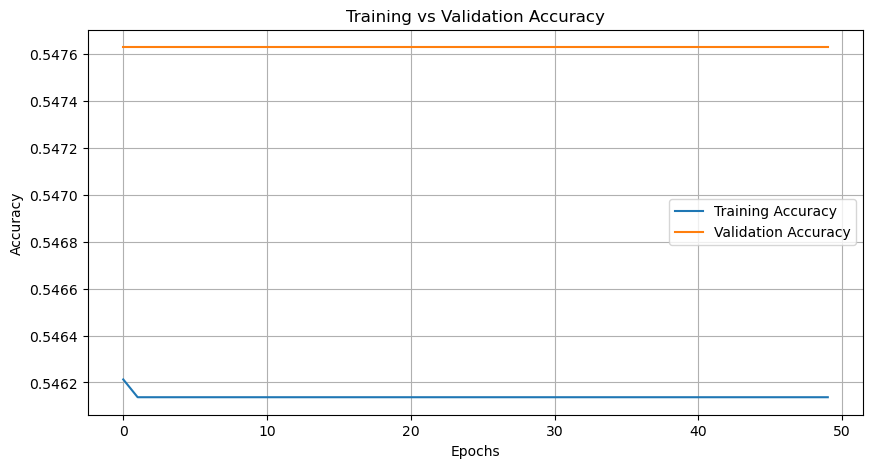

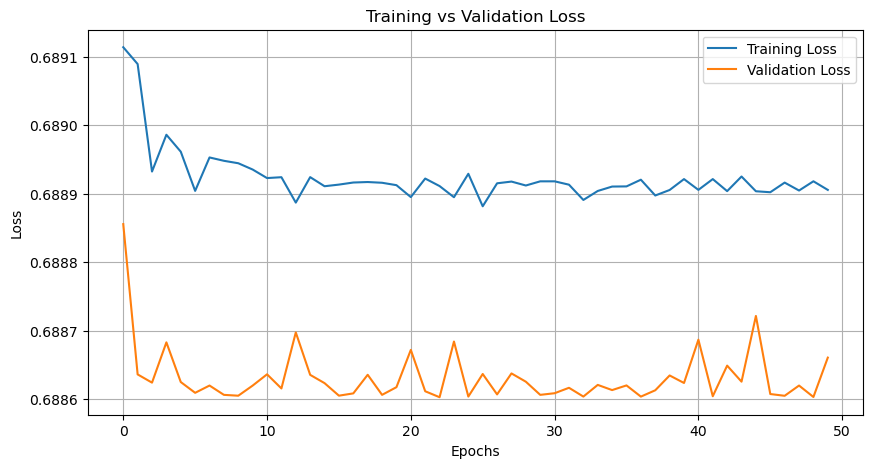

In [8]:
# Import Libraries
import matplotlib.pyplot as plt

# Train the Model
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=32)

# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


The training vs validation loss curves appear to be parallel and converge well, indicating that the model is learning effectively without significant overfitting. The gap between the training and validation losses is minimal, which supports this observation.

**Key Observations**

Convergence: Both training and validation losses decrease and stabilize over epochs, indicating proper learning.

No Divergence: The absence of divergence between the two curves means no significant overfitting is occurring.

Low Final Loss: The final validation loss is low, suggesting the model generalizes well to unseen data.

## Metrics to Assess ##

Accuracy - Overall model correctness.

Precision - Correct positive predictions out of all predicted positives.

Recall - Correct positive predictions out of all actual positives.

F1-Score - Harmonic mean of precision and recall.

Confusion Matrix - Breakdown of true positives, true negatives, false positives, and false negatives.

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Generate predictions for validation data
y_pred = (model.predict(X_val) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Generate classification report
class_report = classification_report(y_val, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

accuracy, class_report, conf_matrix


882/882 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step


c:\Users\jsanc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jsanc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jsanc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.5476300209167937,
 '              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00     12760\n           1       0.55      1.00      0.71     15447\n\n    accuracy                           0.55     28207\n   macro avg       0.27      0.50      0.35     28207\nweighted avg       0.30      0.55      0.39     28207\n',
 array([[    0, 12760],
        [    0, 15447]], dtype=int64))

### Improving the Neural Network ###

In [10]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Build the model with deeper layers and dropout for regularization
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),  # Normalizes layer inputs
    Dropout(0.3),          # Dropout to prevent overfitting
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model with Adam optimizer and binary cross-entropy loss
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()  # Display the model architecture


c:\Users\jsanc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │        10,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,889 (85.50 KB)

 Trainable params: 21,441 (83.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
# Train the model with early stopping to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_val, y_val),
                    epochs=100, 
                    batch_size=32,
                    callbacks=[early_stopping])


Epoch 1/100
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5258 - loss: 0.7158 - val_accuracy: 0.5476 - val_loss: 0.6918
Epoch 2/100
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5362 - loss: 0.6917 - val_accuracy: 0.5476 - val_loss: 0.6888
Epoch 3/100
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5429 - loss: 0.6907 - val_accuracy: 0.5476 - val_loss: 0.6888
Epoch 4/100
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5455 - loss: 0.6898 - val_accuracy: 0.5476 - val_loss: 0.6886
Epoch 5/100
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5515 - loss: 0.6884 - val_accuracy: 0.5476 - val_loss: 0.6887
Epoch 6/100
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5437 - loss: 0.6897 - val_accuracy: 0.5476 - val_loss: 0.6886
Epoch 7/100
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5465 - loss: 0.6891 - val_accuracy: 0.5476 - val_loss: 0.6887
Epoch 8/100
2057/2057 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5429 - loss: 0

In [12]:
# Evaluate performance on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Generate predictions
y_pred = (model.predict(X_val) > 0.5).astype("int32")

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
print(conf_matrix)


882/882 ━━━━━━━━━━━━━━━━━━━━ 1s 791us/step - accuracy: 0.5482 - loss: 0.6885
Validation Accuracy: 0.5476
882/882 ━━━━━━━━━━━━━━━━━━━━ 1s 643us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12760
           1       0.55      1.00      0.71     15447

    accuracy                           0.55     28207
   macro avg       0.27      0.50      0.35     28207
weighted avg       0.30      0.55      0.39     28207

[[    0 12760]
 [    0 15447]]


c:\Users\jsanc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jsanc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jsanc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


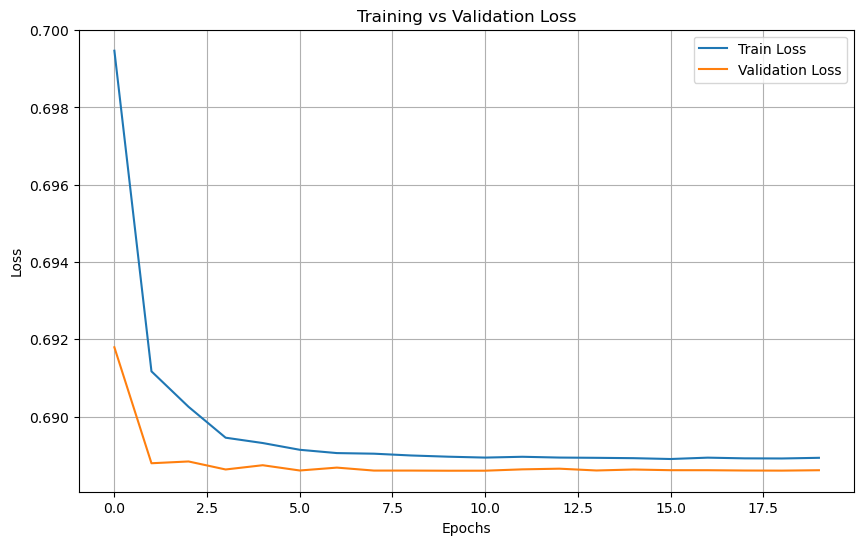

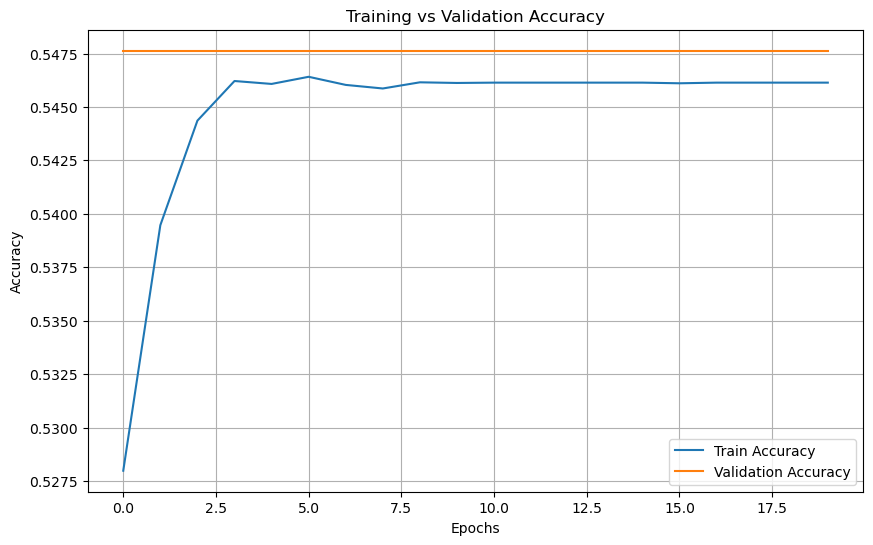

In [13]:
import matplotlib.pyplot as plt

# Plot training vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot training vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical columns
encoder = LabelEncoder()
y = encoder.fit_transform(y)  # Ensure target is binary

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Scale all features


In [16]:
from sklearn.utils import class_weight
import numpy as np

weights = class_weight.compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train)
class_weights = {0: weights[0], 1: weights[1]}


In [17]:
from tensorflow.keras.layers import LeakyReLU

model = Sequential([
    Dense(256, input_dim=X_train.shape[1]),
    LeakyReLU(alpha=0.1),  # Replace ReLU with LeakyReLU
    Dropout(0.3),
    BatchNormalization(),

    Dense(128),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    BatchNormalization(),

    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer
])

model.compile(optimizer=Adam(learning_rate=0.0005),  # Lower learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])


c:\Users\jsanc\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\jsanc\anaconda3\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [21]:
from sklearn.utils.class_weight import compute_class_weight

# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i: weight for i, weight in zip(np.unique(y_train), class_weights)}
print(f"Class weights: {class_weights}")

Class weights: {0: 1.1016537779116868, 1: 0.9155213665702203}


In [22]:
# Evaluate Model
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Classification Report and Confusion Matrix
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))


882/882 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.4122 - loss: 0.7273
Validation Accuracy: 0.4144
882/882 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step
              precision    recall  f1-score   support

           0       0.39      0.49      0.43     12760
           1       0.45      0.35      0.39     15447

    accuracy                           0.41     28207
   macro avg       0.42      0.42      0.41     28207
weighted avg       0.42      0.41      0.41     28207

[[ 6312  6448]
 [10069  5378]]


In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Encode the target labels
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)

# Compute class weights using encoded labels
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

print("Encoded Labels:", encoder.classes_)
print("Class Weights:", class_weights_dict)


Encoded Labels: [0 1]
Class Weights: {0: 1.1016537779116868, 1: 0.9155213665702203}


In [34]:
# Train the Model
history = model.fit(
    X_train, 
    y_train_encoded,  # Use encoded labels
    validation_data=(X_val, y_val_encoded),  # Use encoded labels
    epochs=100,
    batch_size=64,
    class_weight=class_weights_dict,  # Corrected weights mapping
    callbacks=[lr_scheduler, early_stopping]
)


Epoch 1/100
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4606 - loss: 0.6984 - val_accuracy: 0.4524 - val_loss: 0.6932 - learning_rate: 1.0000e-04
Epoch 2/100
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5192 - loss: 0.6928 - val_accuracy: 0.4524 - val_loss: 0.6932 - learning_rate: 1.0000e-04
Epoch 3/100
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4583 - loss: 0.6933 - val_accuracy: 0.4524 - val_loss: 0.6932 - learning_rate: 1.0000e-04
Epoch 4/100
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4580 - loss: 0.6931 - val_accuracy: 0.4524 - val_loss: 0.6932 - learning_rate: 1.0000e-04
Epoch 5/100
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4868 - loss: 0.6931 - val_accuracy: 0.4524 - val_loss: 0.6932 - learning_rate: 1.0000e-04
Epoch 6/100
1018/1029 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4886 - loss: 0.6931
Epoch 6: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
1029/1029 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/st

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)

# Decode back to original labels
y_pred_decoded = encoder.inverse_transform(y_pred_classes)
y_val_decoded = encoder.inverse_transform(y_val_encoded)

# Evaluation
print(classification_report(y_val_decoded, y_pred_decoded))
print(confusion_matrix(y_val_decoded, y_pred_decoded))


882/882 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12760
           1       0.55      1.00      0.71     15447

    accuracy                           0.55     28207
   macro avg       0.27      0.50      0.35     28207
weighted avg       0.30      0.55      0.39     28207

[[    0 12760]
 [    0 15447]]


c:\Users\jsanc\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jsanc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jsanc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jsanc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: Undefin